## Black-box exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [6]:
## load dataset
df = pd.read_pickle("../dataFrames/df_events_LHCO2020_BlackBox1.pkl")

In [7]:
df.describe()

,evtIdx,isSignal,jet_0_tau_1,jet_0_tau_2,jet_0_tau_3,jet_0_tau_r21,jet_0_tau_r32,jet_1_tau_1,jet_1_tau_2,jet_1_tau_3,...,jet_1_const_0_phi,jet_1_const_0_pt,jet_1_const_1_constidx,jet_1_const_1_eta,jet_1_const_1_phi,jet_1_const_1_pt,jet_1_const_2_constidx,jet_1_const_2_eta,jet_1_const_2_phi,jet_1_const_2_pt
count,999999.000000,999999.0,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,...,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,499999.000000,0.0,0.012130,0.008784,0.007986,2.496328,2.689362,0.012478,0.009563,0.009022,...,0.001732,352.584944,42.152459,-0.000095,0.002607,172.130874,41.236659,-0.000262,0.001974,109.761740
std,288674.990257,0.0,0.029040,0.022206,0.021723,44.426082,32.203297,0.036290,0.031878,0.027302,...,1.814509,221.459319,24.853474,0.801470,1.814134,91.833627,24.550595,0.800964,1.814223,52.990333
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.141593,20.321569,0.000000,-2.991166,-3.141584,0.000000,0.000000,-3.263251,-3.141589,0.000000
25%,249999.500000,0.0,0.002989,0.002441,0.002400,0.282549,0.431399,0.003192,0.002777,0.002788,...,-1.569745,190.983414,23.000000,-0.582413,-1.568188,107.076359,22.000000,-0.582171,-1.569305,72.538658
50%,499999.000000,0.0,0.006584,0.004836,0.004577,0.861612,1.000000,0.006614,0.005368,0.005293,...,0.001282,297.451355,37.000000,-0.000103,0.001433,151.967194,36.000000,0.000000,0.000000,100.143097
75%,749998.500000,0.0,0.014813,0.009656,0.008779,1.850778,2.032805,0.014085,0.010313,0.009893,...,1.573966,457.420349,56.000000,0.582099,1.574353,215.580826,55.000000,0.581346,1.574017,136.490982
max,999998.000000,0.0,5.993892,5.772088,5.919134,38616.197411,16100.068369,6.016278,6.058575,5.857625,...,3.141587,3051.232666,232.000000,2.924499,3.141577,1453.972778,252.000000,2.997483,3.141590,940.051208


Grab the kinematic variables like mass, momentum, etc.

In [21]:
kin_start = 13
kin_end = 23
kinematic_data_array = df.to_numpy()[:,kin_start:kin_end].astype(float)

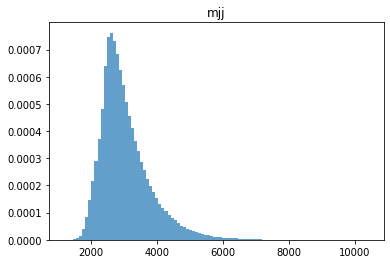

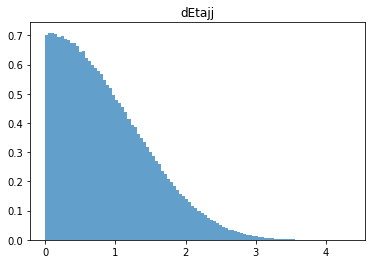

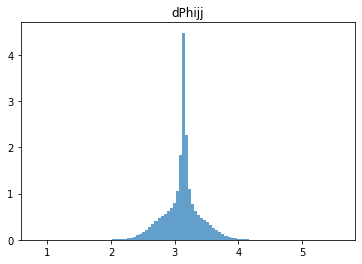

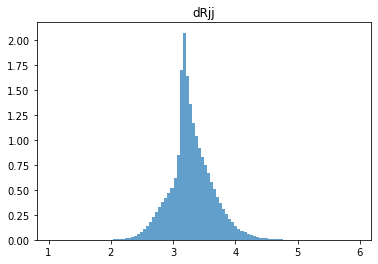

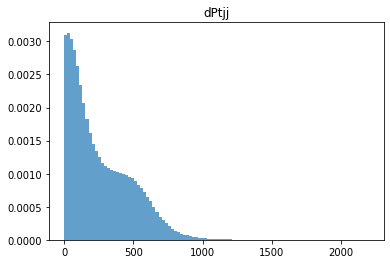

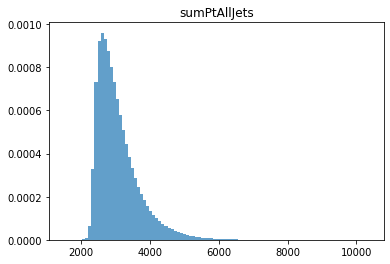

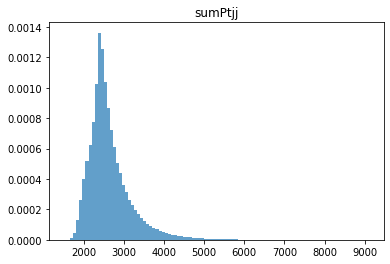

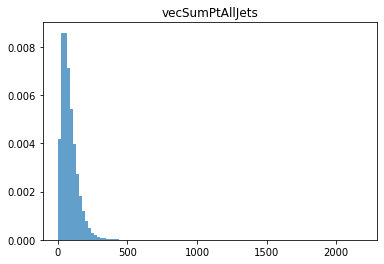

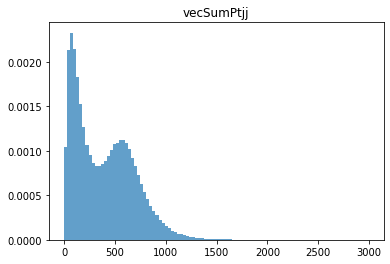

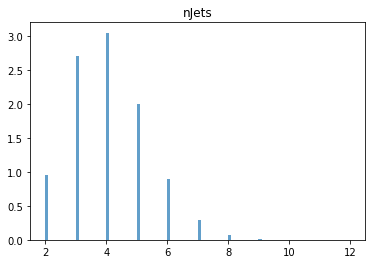

In [26]:
for param in range(kinematic_data_array.shape[1]):
    plt.hist(kinematic_data_array[:, param], alpha=0.7, density=True, bins=100)
    plt.title(f"{df.columns[param+kin_start]}")
    plt.show()
    print()

Now let's plot all variables against each other.

In [ ]:
num_features = kin_end - kin_start

fig, ax = plt.subplots(num_features - 1, num_features - 1, figsize=(5*num_features, 5*num_features))

for param_1 in range(num_features):
    for param_2 in range(param_1 + 1, num_features):
            this_ax = ax[param_1, param_2- 1]
            this_ax.scatter(background_array[:, param_1], background_array[:, param_2], alpha=0.5, label='background')
            this_ax.scatter(signal_array[:, param_1], signal_array[:, param_2], alpha=0.5, label='signal')
            # Get the correct labels
            this_ax.set_xlabel(f"{df.columns[param_1+3]}", fontsize=14)
            this_ax.set_ylabel(f"{df.columns[param_2+3]}", fontsize=14)
            this_ax.xaxis.set_tick_params(labelsize=14)
            this_ax.yaxis.set_tick_params(labelsize=14)
            
fig.suptitle("Exploratory data analysis", fontsize=20)
ax[0, 0].legend(fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig("eda.png")